In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv(r"C:\Users\LENOVO PC\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape

(1470, 35)

In [5]:
#checking for data dimension, missing values and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [201]:
#checking for the null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [203]:
#check unique values in the column
print(data.apply(lambda col: col.unique().sum()))

Age                                                                      1677
Attrition                                                               YesNo
BusinessTravel                       Travel_RarelyTravel_FrequentlyNon-Travel
DailyRate                                                              710161
Department                         SalesResearch & DevelopmentHuman Resources
DistanceFromHome                                                          435
Education                                                                  15
EducationField              Life SciencesOtherMedicalMarketingTechnical De...
EnvironmentSatisfaction                                                    10
Gender                                                             FemaleMale
HourlyRate                                                               4615
JobInvolvement                                                             10
JobLevel                                                        

<h2>Univariate Analysis</h2>

In [105]:
#summary of the data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<h2>Analysis Of The Numerical Features</h2>

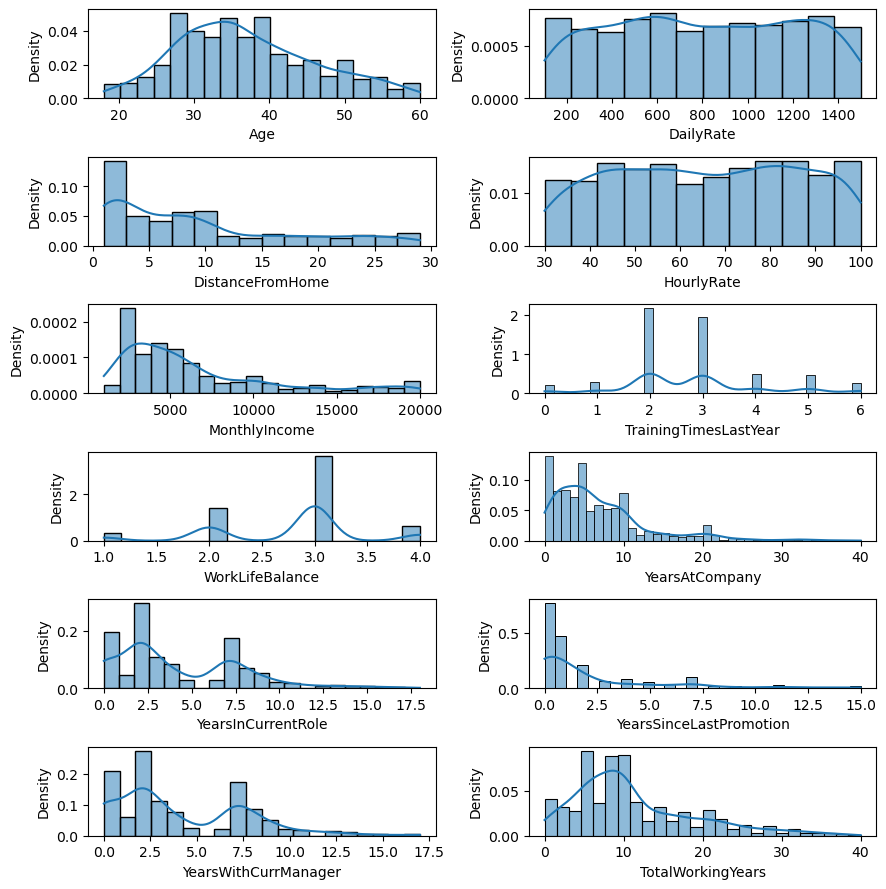

In [41]:
#warnings.filterwarnings('always')
#warnings.filterwarnings('ignore')

fig,ax = plt.subplots(6,2, figsize=(9,9))
sns.histplot(data['Age'], ax = ax[0,0], kde="True", stat="density")
sns.histplot(data['DailyRate'], ax = ax[0,1], kde="True", stat="density")
sns.histplot(data['DistanceFromHome'], ax = ax[1,0], kde="True", stat="density")
sns.histplot(data['HourlyRate'], ax = ax[1,1], kde="True", stat="density")
sns.histplot(data['MonthlyIncome'], ax = ax[2,0], kde="True", stat="density")
sns.histplot(data['TrainingTimesLastYear'], ax = ax[2,1], kde="True", stat="density")
sns.histplot(data['WorkLifeBalance'], ax = ax[3,0], kde="True", stat="density")
sns.histplot(data['YearsAtCompany'], ax = ax[3,1], kde="True", stat="density")
sns.histplot(data['YearsInCurrentRole'], ax = ax[4,0], kde="True", stat="density")
sns.histplot(data['YearsSinceLastPromotion'], ax = ax[4,1], kde="True", stat="density")
sns.histplot(data['YearsWithCurrManager'], ax = ax[5,0], kde="True", stat="density")
sns.histplot(data['TotalWorkingYears'], ax = ax[5,1], kde="True", stat="density")

plt.tight_layout()
plt.show()

<h2>Analysis of the categorical features and the numeric discrete features</h2>

<h3>Attrition</h3>

In [204]:
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

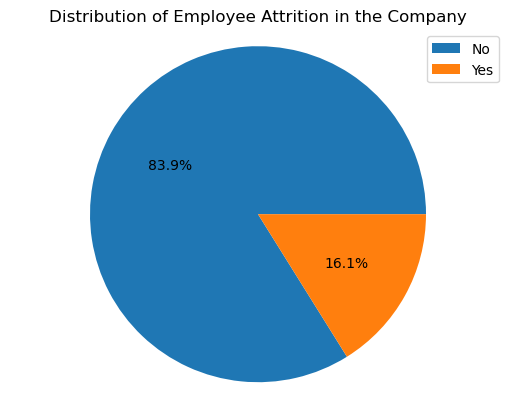

In [206]:
labels='No','Yes'
plt.pie(data['Attrition'].value_counts(),autopct='%1.1f%%')
plt.title('Distribution of Employee Attrition in the Company') 
plt.axis('equal') 
plt.legend(labels, loc= 'upper right')
plt.show()

<h3>Age</h3>

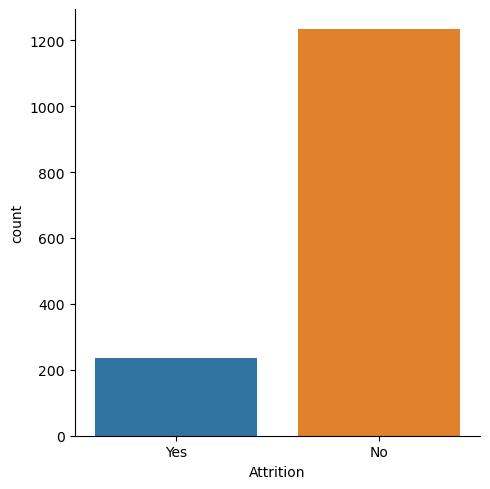

In [140]:
sns.catplot(data, x='Attrition', kind='count')

<h3>BusinessTravel</h3>

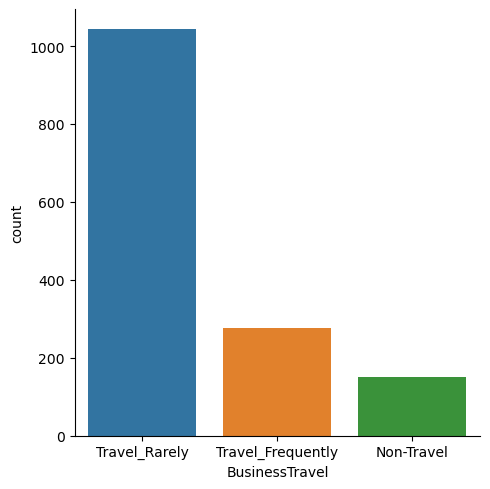

In [141]:
sns.catplot(data, x='BusinessTravel', kind='count')

<h3>Over Time</h3>

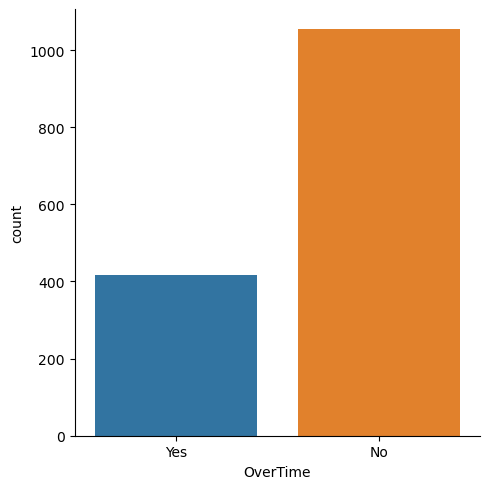

In [142]:
sns.catplot(data, x='OverTime', kind='count')

<h3>Department</h3>

In [188]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

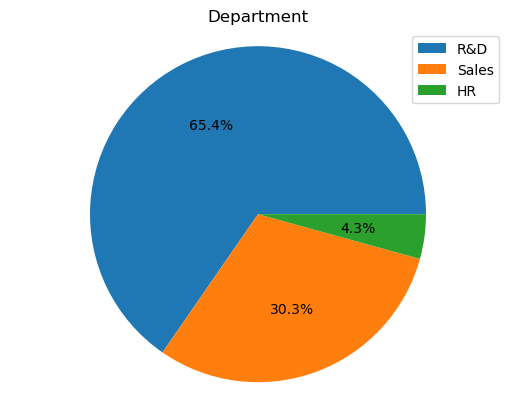

In [189]:
labels = 'R&D','Sales', 'HR'
plt.pie(data['Department'].value_counts(),autopct='%0.1f%%')
plt.title('Department') 
plt.axis('equal') 
plt.legend(labels, loc= 'best')

<h3>EducationField</h3>

In [178]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

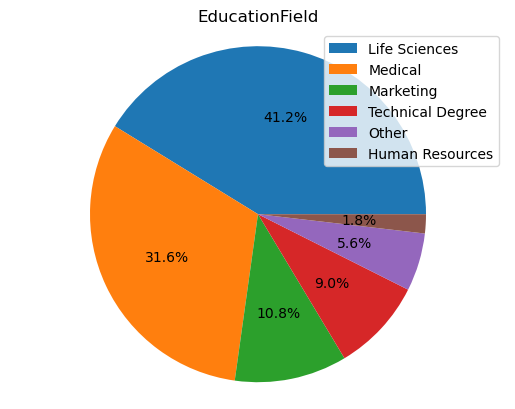

In [181]:
labels = 'Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
plt.pie(data['EducationField'].value_counts(),autopct='%0.1f%%')
plt.title('EducationField') 
plt.axis('equal') 
plt.legend(labels, loc= 'best')

<h3>Gender</h3>

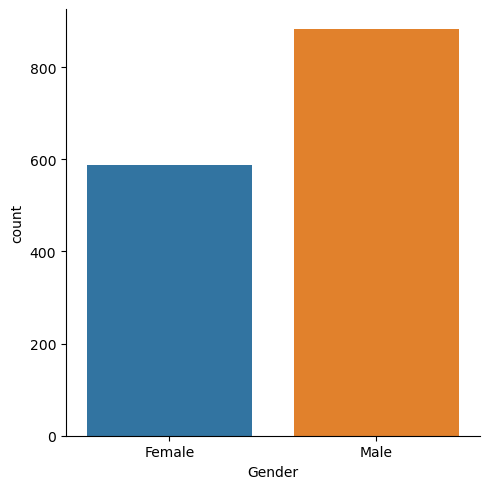

In [145]:
sns.catplot(data, x='Gender', kind='count')

<h3>Job Role</h3>

In [174]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

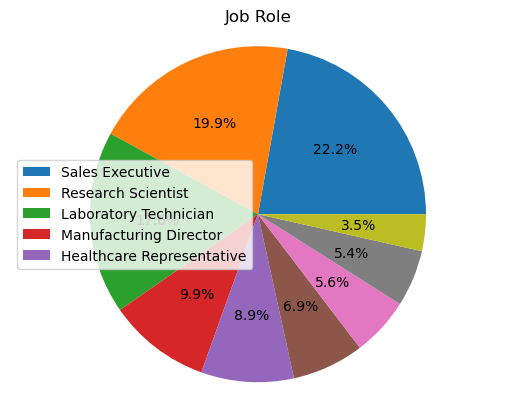

In [179]:
labels = 'Sales Executive','Research Scientist', 'Laboratory Technician', 'Manufacturing Director','Healthcare Representative',   
'Manager', 'Sales Representative', 'Research Director', 'Research Director', 'Human Resources'   
plt.pie(data['JobRole'].value_counts(),autopct='%0.1f%%')
plt.title('Job Role') 
plt.axis('equal') 
plt.legend(labels, loc= 'best')

<h3>JobInvolvement</h3>

In [184]:
data['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

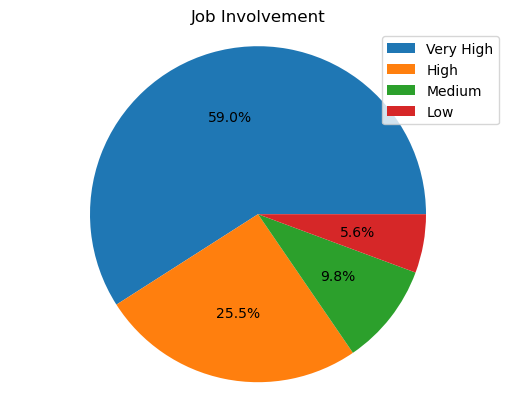

In [187]:
labels = 'Very High','High','Medium','Low'

plt.pie(data['JobInvolvement'].value_counts(),autopct='%0.1f%%')
plt.title('Job Involvement') 
plt.axis('equal') 
plt.legend(labels, loc= 'upper right')

<h3>MaritalStatus</h3>

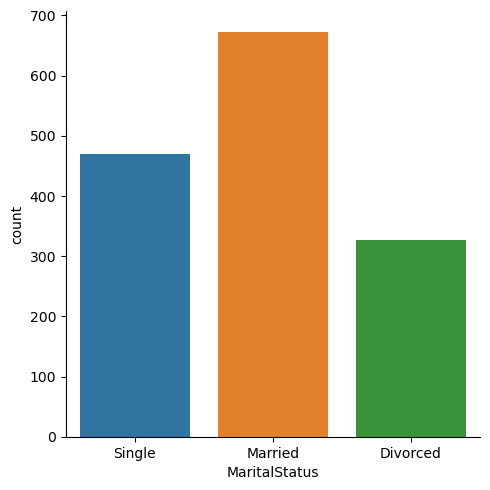

In [147]:
sns.catplot(data, x='MaritalStatus', kind='count')

<h3>Environment Satisfaction</h3>

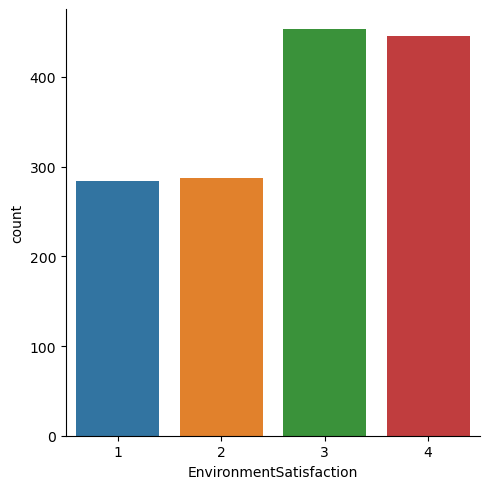

In [148]:
sns.catplot(data, x='EnvironmentSatisfaction', kind='count')

<h3>JobSatisfaction</h3>

In [182]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

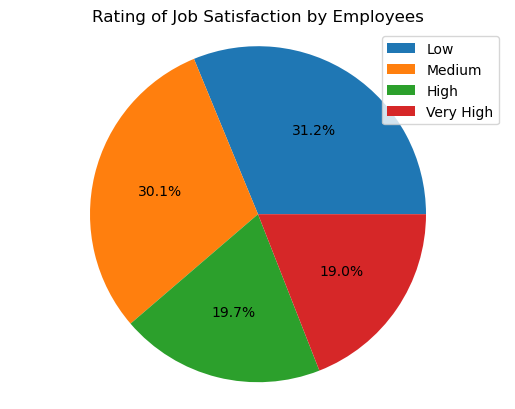

In [183]:
labels = 'Low','Medium','High','Very High'

plt.pie(data['JobSatisfaction'].value_counts(),autopct='%0.1f%%')
plt.title('Rating of Job Satisfaction by Employees') 
plt.axis('equal') 
plt.legend(labels, loc= 'upper right')

<h3>Performance Rating</h3>

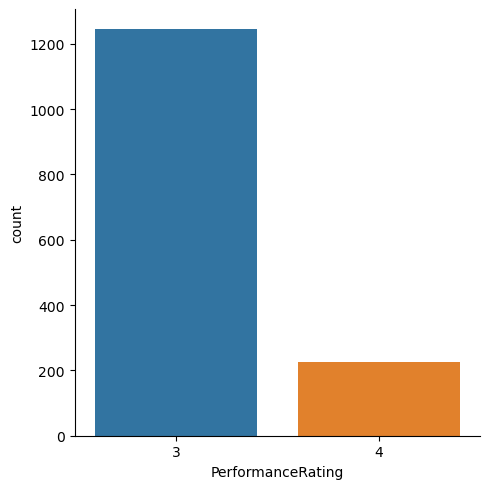

In [150]:
sns.catplot(data, x='PerformanceRating', kind='count')

<h3>Relationship Satisfaction</h3>

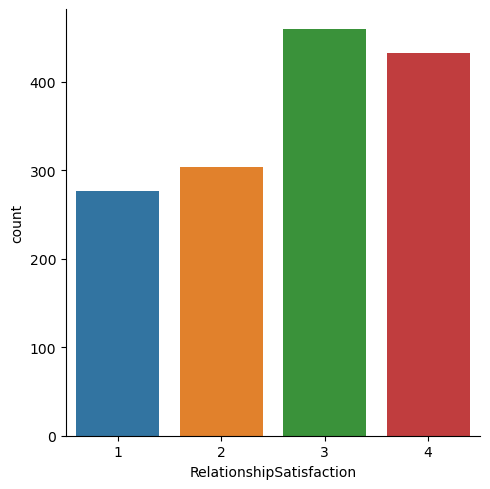

In [151]:
sns.catplot(data, x='RelationshipSatisfaction', kind='count')

<h3>Work Life Balance</h3>

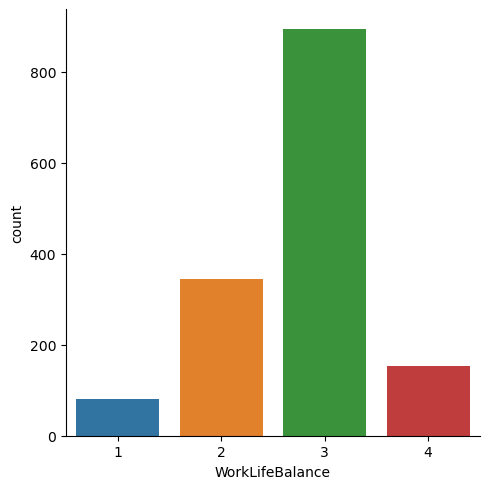

In [152]:
sns.catplot(data, x='WorkLifeBalance', kind='count')

<h3>StockOptionLevel</h3>

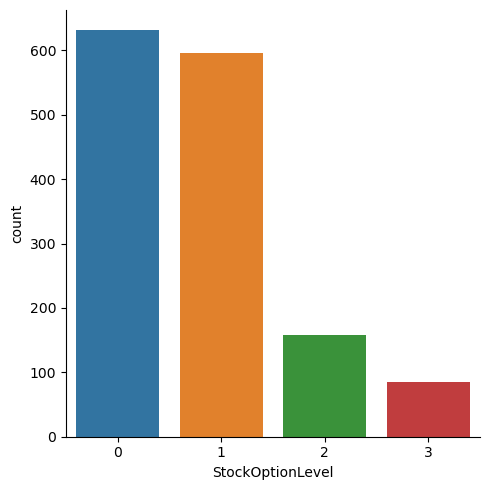

In [153]:
sns.catplot(data, x='StockOptionLevel', kind='count')

C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_12844\2206752900.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat= data.corr()


<Axes: >

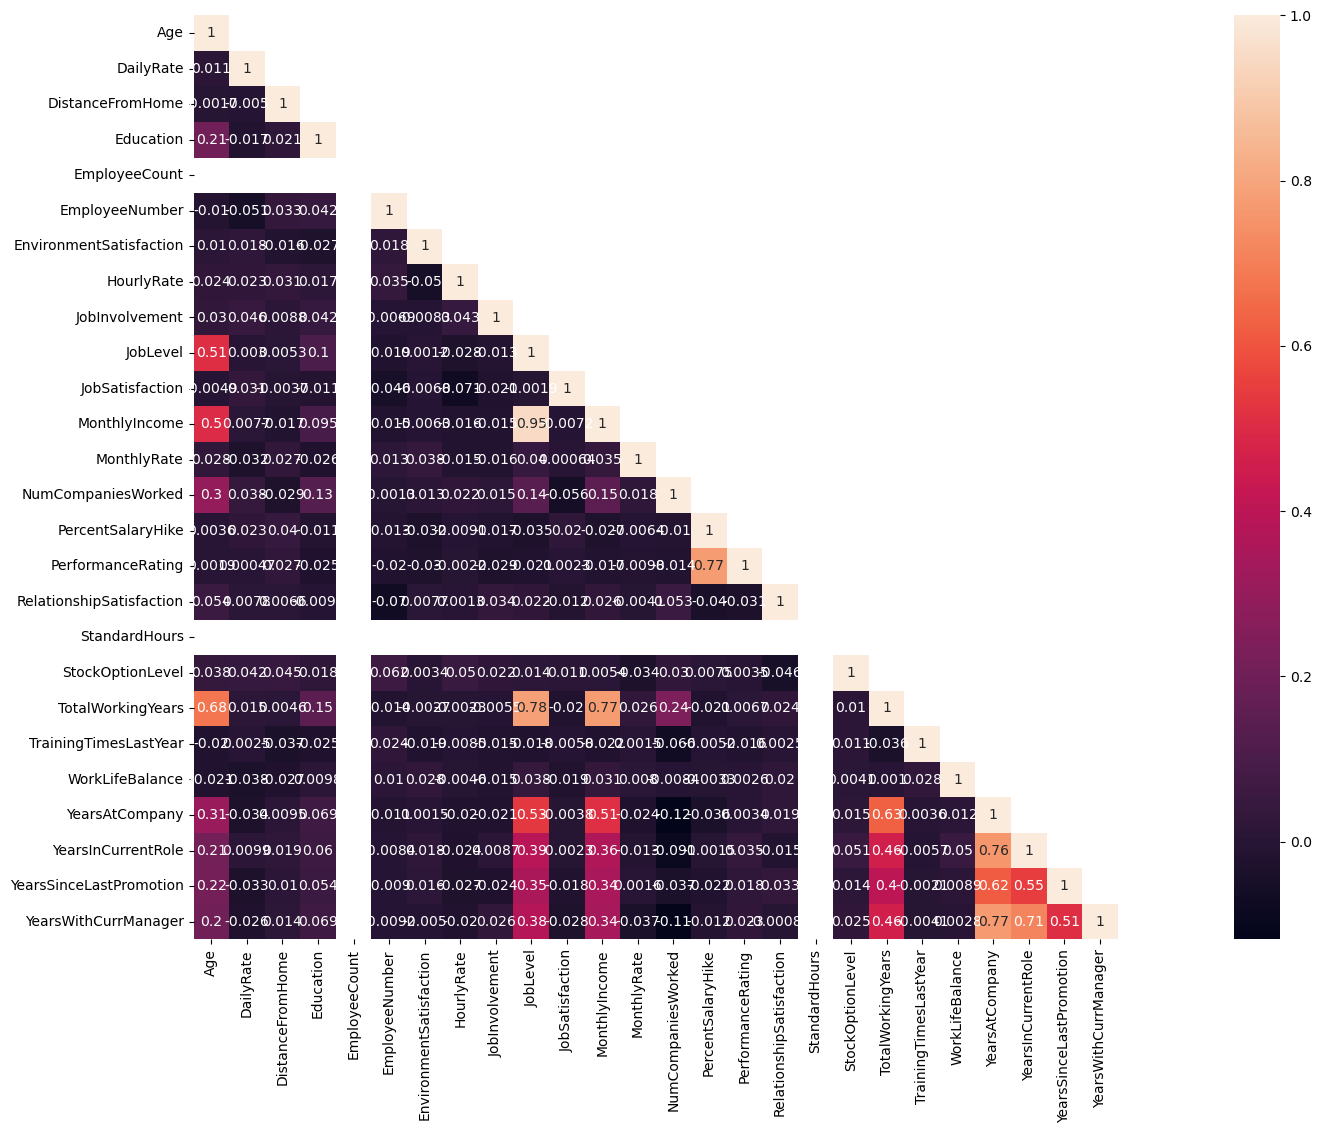

In [158]:
#corelation matrix.
cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

<h2>Plotting the features against the target variable</h2>

<h3>Age</h3>

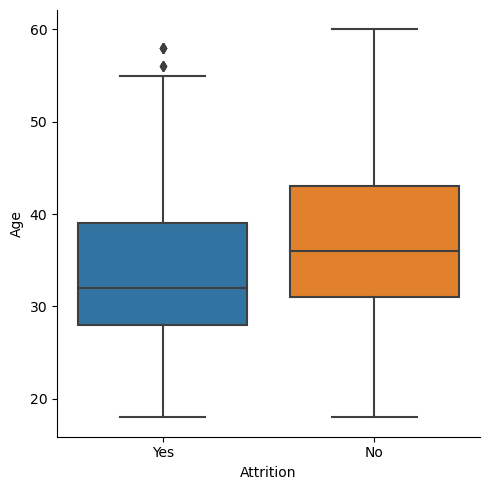

In [120]:
sns.catplot(data,x='Attrition',y='Age',kind='box')

<h3>Department</h3>

In [190]:
dpm = data.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


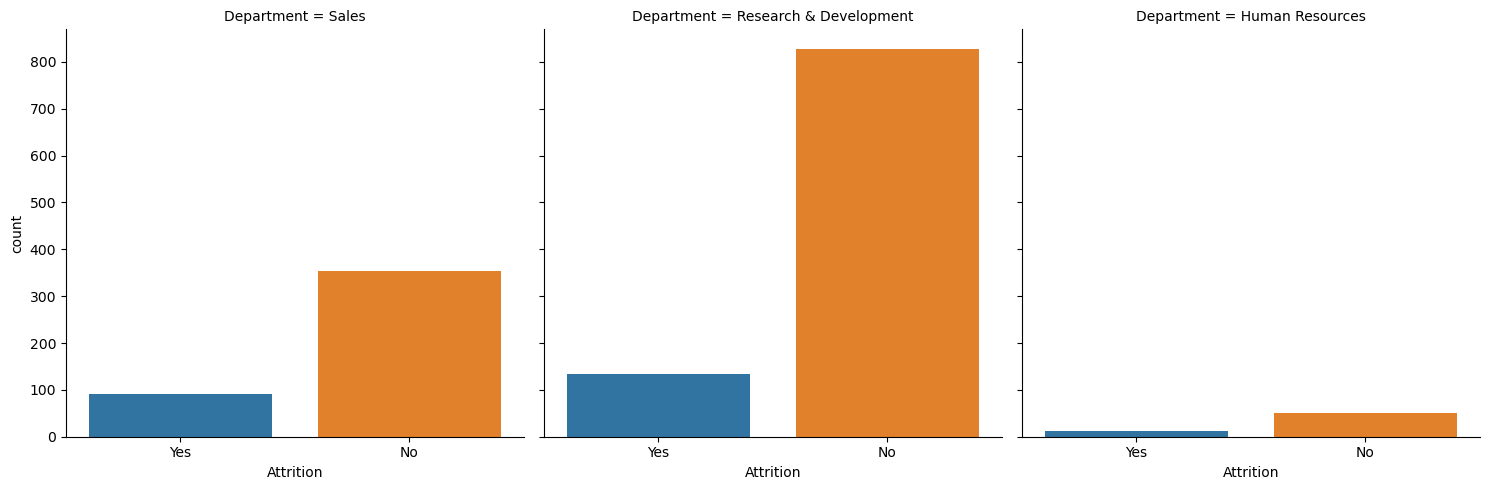

In [121]:
sns.catplot(data,kind='count',x='Attrition',col='Department')

<h3>Gender</h3>

In [125]:
pd.crosstab(columns=[data.Attrition],index=[data.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


In [209]:
ef = data.groupby("EducationField")['Attrition'].value_counts(normalize=False).unstack()
ef

Attrition,No,Yes
EducationField,,
Human Resources,20,7
Life Sciences,517,89
Marketing,124,35
Medical,401,63
Other,71,11
Technical Degree,100,32


<h3>JobLevel</h3>

In [126]:
pd.crosstab(columns=[data.Attrition],index=[data.JobLevel],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


<h3>MonthlyIncome</h3>

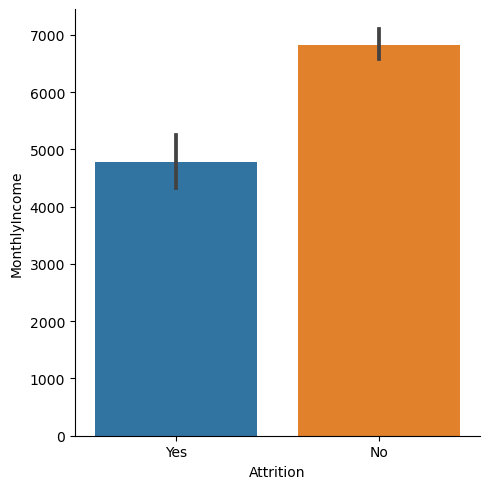

In [127]:
sns.catplot(data,kind='bar',x='Attrition',y='MonthlyIncome')

<h3>JobSatisfaction</h3>

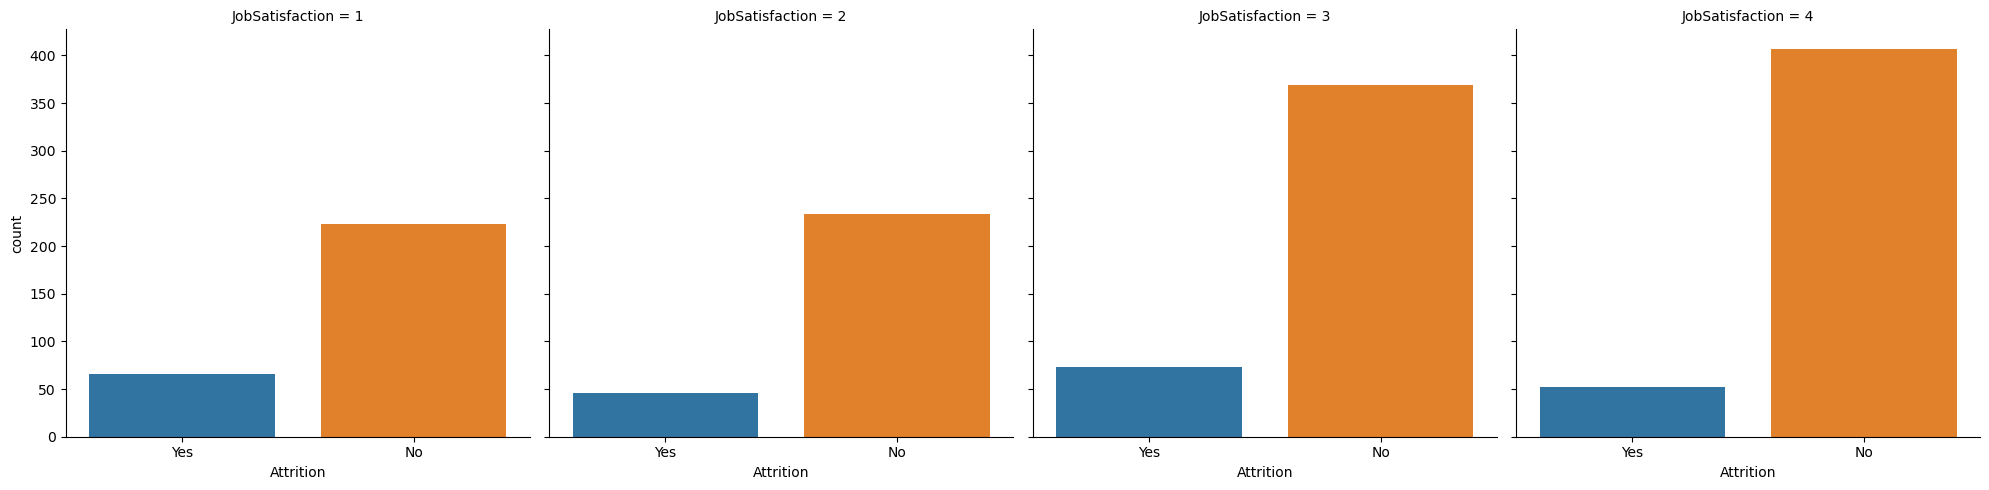

In [129]:
sns.catplot(data,kind='count',x='Attrition',col='JobSatisfaction')

In [131]:
pd.crosstab(columns=[data.Attrition],index=[data.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


<h3>EnvironmentSatisfaction</h3>

In [132]:
pd.crosstab(columns=[data.Attrition],index=[data.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


<h3>Job Involvement</h3>

In [133]:
pd.crosstab(columns=[data.Attrition],index=[data.JobInvolvement],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobInvolvement,,
1,0.662651,0.337349
2,0.810667,0.189333
3,0.855991,0.144009
4,0.909722,0.090278
All,0.838776,0.161224


<h3>Work Life Balance</h3>

In [134]:
pd.crosstab(columns=[data.Attrition],index=[data.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


<h3>RelationshipSatisfaction</h3>

In [136]:
pd.crosstab(columns=[d.Attrition],index=[data.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


<h3>Marital Status</h3>

In [192]:
pd.crosstab(columns=[data.Attrition],index=[data.MaritalStatus],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319
All,0.838776,0.161224


<h2>Dropping the non-relevant featues</h2>

In [211]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

ValueError: No axis named 1 for object type Series

In [214]:
# Drop unrequired variables: StandardHours,EmployeeCount,Over18,EmployeeNumber,StockOptionLevel
data.drop(columns=['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
           ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],inplace=True, errors='ignore')
data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Sales,1,2,Life Sciences,2,Female,3,2,...,Yes,11,3,1,8,1,6,4,0,5
1,49,No,Research & Development,8,1,Life Sciences,3,Male,2,2,...,No,23,4,4,10,3,10,7,1,7
2,37,Yes,Research & Development,2,2,Other,4,Male,2,1,...,Yes,15,3,2,7,3,0,0,0,0
3,33,No,Research & Development,3,4,Life Sciences,4,Female,3,1,...,Yes,11,3,3,8,3,8,7,3,0
4,27,No,Research & Development,2,1,Medical,1,Male,3,1,...,No,12,3,4,6,3,2,2,2,2
